# **I. Perkenalan**

- Nama: Cylia Wardana

- Batch: HCK -004

### Problem Statement (SMART)
Mengetahui preferensi dan perilaku customer di Area Metropolitan tahun 2022 untuk meningkatkan kualitas pelayanan dari aplikasi food delivery kedepannya

- S (Specific) : Mengetahui preferensi dan perilaku customer di Area Metropolitan tahun 2022 untuk meningkatkan kualitas pelayanan dari aplikasi food delivery kedepannya
- M (Measurable) : Dapat diukur dari rating yang diberikan oleh customer
- A (Achievable) : Semakin banyak customer baru yang menggunakan aplikasi food delivery bukan hanya dari Area Metropolitan saja dan selalu meningkatkan pelayanan dari feedback yang diberikan customer
- R (Relevant) : Relevant untuk menarik customer baru (more growth) dan juga di sisi lain kedepannya semua akan serba digital sehingga akan lebih banyak customer yang akan menggunakan aplikasi food delivery
- T (Time-Bound) : 2022 - Present

#### 5W + 1H

- Apa tipe makanan yang paling sering dipesan oleh customer?
- Kapan saja peak hour dari aplikasi food delivery?
- Berapa lama perkiraan waktu yang dibutuhkan customer dari awal order hingga selesai?
- Bagaimana respon customer terhadap pelayanan aplikasi food delivery ini?
- Siapa saja pengguna aplikasi food delivery ini?
- Bagaimana cara supaya pelayanan bisa lebih baik lagi (contoh: mempercepat waktu antar)?

# **II. Import Library**

In [1716]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# **III. Data Loading**

Sumber: Kaggle (https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?group=bookmarked)

In [1717]:
pd.set_option("display.max.columns",None)

Untuk menjabarkan seluruh column di tabel dataset

In [1718]:
df = pd.read_csv('food_delivery_dataset.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [1719]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


Menjabarkan 5 baris pertama

In [1720]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


Menjabarkan 5 baris terakhir

# **IV. Data Cleaning**

In [1721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

Untuk mengetahui tipe data dari masing-masing kolom, terlihat bahwa terdapat tipe data yang salah seperti age dan ratings yang seharusnya tipe datanya adalah float, maka dilanjutkan untuk dilihat total missing valuenya terlebih dahulu

In [1722]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

Pengecekan awal untuk mengetahui ada berapa missing value di masing-masing kolom, terlihat pada data diatas tidak ditemukan adanya missing value, maka selanjutnya dilakukan pengecekan **non-standard missing value** 

In [1723]:
missing_values = ["NaN ", "Nan", "n/a", "na", "--", "none", "?", "nan"]
df = pd.read_csv('food_delivery_dataset.csv', na_values = missing_values)

In [1724]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

Setelah dilakukan pengecekan non-standard missing value, ditemukan bahwa ternyata pada beberapa kolom ternyata terdapat missing value

In [1725]:
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"=",df[i].isnull().sum()*100/df.shape[0],"% -->",df[i].dtype)

Delivery_person_Age = 4.066413703858048 % --> float64
Delivery_person_Ratings = 4.1848529379510016 % --> float64
Time_Orderd = 3.7966354484241003 % --> object
Road_traffic_density = 1.318184809071568 % --> object
multiple_deliveries = 2.177965915820411 % --> float64
Festival = 0.5000767661702454 % --> object
City = 2.631982979843397 % --> object


In [1726]:
df.dropna(inplace=True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,(min) 26


Karena setelah diperiksa persentase missing value (pada setiap kolom) masih dibawah 10% maka diputuskan semua missing value untuk dihilangkan saja menggunakan dropna()

In [1727]:
df.rename(columns={'Time_Orderd' : 'Time_Order'},inplace=True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,(min) 26


Mengganti nama kolom "Time_Orderd" menjadi "Time_Order"

In [1728]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])  
df['Time_Order'] = pd.to_datetime(df['Time_Order'])
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  float64       
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Order                   41368 non-null  datetime64[ns]
 10  Time_Order_picked            41368 non-null  datetime64[ns]
 11  Weatherconditions            41368 non-nu

Mengganti tipe data Order_Date, Time_Order dan Time_Order_picked menjadi datetime dan terlihat juga tipe data sudah sesuai dengan masing-masing kolom

In [1729]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.slice(6)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


Digunakan untuk menghilangkan kata (min) di setiap data di kolom Time_taken(min) / hanya menunjukkan angka menitnya saja tanpa tulisan (min)

In [1730]:
df['Time_taken(min)'] = df['Time_taken(min)'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  float64       
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Order                   41368 non-null  datetime64[ns]
 10  Time_Order_picked            41368 non-null  datetime64[ns]
 11  Weatherconditions            41368 non-nu

Mengganti tipe data Time_taken(min) ke integer

In [1731]:
df['City'] = df['City'].replace(['Metropolitian ','Semi-Urban ','Urban '],['Metropolitan','Semi-Urban','Urban'])

Mengganti typo dan menghilangkan spasi di belakang kata-kata diatas di kolom City

In [1732]:
df.drop(['ID','Festival','Vehicle_condition'],axis=1,inplace=True)

Menghilangkan kolom ID karena fungsi dari datanya sama dengan Delivery_person_ID, Festival dan Vehicle condition karena tidak dibutuhkan untuk menjawab problem statement.

# **V. Data Exploration**

In [1733]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26


In [1734]:
df['Lama_Waktu_Pengambilan(min)'] = df['Time_Order_picked'] - df['Time_Order']
df['Lama_Waktu_Pengambilan(min)'] = df['Lama_Waktu_Pengambilan(min)'].dt.seconds / 60
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24,15.0
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26,15.0
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32,10.0
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36,15.0
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16,15.0
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26,5.0


Menambahkan kolom Lama_Waktu_Pengambilan(min) yang dihitung dengan cara mengurangi waktu Time_Order_picked dengan Time_Order

In [1735]:
df['total_waktu'] = df['Time_taken(min)']+df['Lama_Waktu_Pengambilan(min)']
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24,15.0,39.0
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26,15.0,41.0
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32,10.0,42.0
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36,15.0,51.0
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16,15.0,31.0
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26,5.0,31.0


Menambahkan kolom total_waktu untuk mengetahui berapa total waktu yang dibutuhkan customer untuk mendapatkan makanan (dari pertama kali order)

In [1736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           41368 non-null  object        
 1   Delivery_person_Age          41368 non-null  float64       
 2   Delivery_person_Ratings      41368 non-null  float64       
 3   Restaurant_latitude          41368 non-null  float64       
 4   Restaurant_longitude         41368 non-null  float64       
 5   Delivery_location_latitude   41368 non-null  float64       
 6   Delivery_location_longitude  41368 non-null  float64       
 7   Order_Date                   41368 non-null  datetime64[ns]
 8   Time_Order                   41368 non-null  datetime64[ns]
 9   Time_Order_picked            41368 non-null  datetime64[ns]
 10  Weatherconditions            41368 non-null  object        
 11  Road_traffic_density         41368 non-nu

In [1737]:
df['hours'] = df['Time_Order'].dt.hour

Menambahkan kolom hours dimana kolom ini menunjukan pukul berapa customer memesan makanan

In [1738]:
df['hours'] = df['hours'].replace(0,24)

Mengganti jam 0 menjadi jam 24 / 12 malam

In [1739]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24,15.0,39.0,11
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0,19
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26,15.0,41.0,8
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0,18
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0,13


Data yang sudah ditambahkan dengan kolom-kolom baru

In [1740]:
indikator_rating = []
for i in df['Delivery_person_Ratings']:
    if i >= 4.5:
        indikator_rating.append('Excellent')
    elif i >= 4.0:
        indikator_rating.append('Good')
    elif i >= 3.5:
        indikator_rating.append('Average')
    elif i >= 3.0:
        indikator_rating.append('Bad')
    else:
        indikator_rating.append('Poor')

df['indikator_rating'] = indikator_rating
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours,indikator_rating
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24,15.0,39.0,11,Excellent
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0,19,Excellent
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26,15.0,41.0,8,Good
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0,18,Excellent
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0,13,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32,10.0,42.0,11,Excellent
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36,15.0,51.0,19,Excellent
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16,15.0,31.0,23,Excellent
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26,5.0,31.0,13,Excellent


Menambahkan kolom indikator rating dimana penilaiannya yaitu:
- 4.5 - 5.0 = Excellent
- 4.0 - 4.4 = Good
- 3.5 - 3.9 = Average
- 3.0 - 3.4 = Bad
- < 3.0 = Poor

In [1741]:
def haversine(Olat,Olon,Dlat,Dlon):
    d_lat = np.radians(Dlat - Olat)
    d_lon = np.radians(Dlon - Olon)
    a = (np.sin(d_lat / 2.) * np.sin(d_lat / 2.) +
         np.cos(np.radians(Olat)) * np.cos(np.radians(Dlat)) *
         np.sin(d_lon / 2.) * np.sin(d_lon / 2.))
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    d = 6370 * c
    return d

Rumus untuk menghitung jarak antara restoran dan tempat tujuan

In [1742]:
df['jarak_tempuh(km)'] = round(haversine(df['Restaurant_latitude'],df['Restaurant_longitude'],df['Delivery_location_latitude'],df['Delivery_location_longitude']),2)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours,indikator_rating,jarak_tempuh(km)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-02-23 11:30:00,2023-02-23 11:45:00,conditions Sunny,High,Snack,motorcycle,0.0,Urban,24,15.0,39.0,11,Excellent,3.02
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0,19,Excellent,20.18
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-02-23 08:30:00,2023-02-23 08:45:00,conditions Sandstorms,Low,Drinks,motorcycle,1.0,Urban,26,15.0,41.0,8,Good,1.55
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0,18,Excellent,7.79
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0,13,Excellent,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32,10.0,42.0,11,Excellent,1.49
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36,15.0,51.0,19,Excellent,11.01
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16,15.0,31.0,23,Excellent,4.66
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26,5.0,31.0,13,Excellent,6.23


## Statistik Deskriptif

### Central Tendency

#### Mean

In [1743]:
df.mean()

/var/folders/ts/drf61cb133z5gjz33hcxvy280000gn/T/ipykernel_44604/3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()
/var/folders/ts/drf61cb133z5gjz33hcxvy280000gn/T/ipykernel_44604/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Delivery_person_Age            29.610013
Delivery_person_Ratings         4.633209
Restaurant_latitude            17.254366
Restaurant_longitude           70.777471
Delivery_location_latitude     17.472437
Delivery_location_longitude    70.841351
multiple_deliveries             0.748139
Time_taken(min)                26.553350
Lama_Waktu_Pengambilan(min)     9.989243
total_waktu                    36.542593
hours                          17.670373
jarak_tempuh(km)               26.907906
dtype: float64

Berikut beberapa hasil rata-rata dari kolom-kolom diatas:
- Rata-rata umur yang memesan makanan melalui food delivery
- Rata-rata rating yang diberikan customer ke aplikasi food delivery
- Rata-rata waktu yang dibutuhkan dari oleh driver untuk mengantarkan makanan adalah 26.5 menit
- Rata-rata waktu yang dibutuhkan driver untuk mengambil makanan (waktu pick-up) adalah 10 menit
- Rata-rata total waktu yang dibutuhkan customer dari pertama kali order hingga order selesai adalah 36.5 menit
- Rata-rata jarak yang ditempuh oleh driver dari restoran sampai ke tempat tujuan yaitu 26.9 km


#### Median

In [1744]:
df.median()

/var/folders/ts/drf61cb133z5gjz33hcxvy280000gn/T/ipykernel_44604/530051474.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()
/var/folders/ts/drf61cb133z5gjz33hcxvy280000gn/T/ipykernel_44604/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Delivery_person_Age            30.000000
Delivery_person_Ratings         4.700000
Restaurant_latitude            18.554382
Restaurant_longitude           75.898497
Delivery_location_latitude     18.636258
Delivery_location_longitude    76.002471
multiple_deliveries             1.000000
Time_taken(min)                26.000000
Lama_Waktu_Pengambilan(min)    10.000000
total_waktu                    36.000000
hours                          19.000000
jarak_tempuh(km)                9.270000
dtype: float64

#### Mode

In [1745]:
df.Delivery_person_Age.mode()

0    35.0
dtype: float64

Customer yang paling banyak memesan makanan via food delivery yaitu yang berusia 35 tahun

In [1746]:
df.Delivery_person_Ratings.mode()

0    4.8
dtype: float64

Rating yang paling banyak diberikan oleh customer kepada aplikasi food delivery yaitu 4.8

In [1747]:
df['Time_taken(min)'].mode()

0    26
dtype: int64

Waktu terbanyak yang ditempuh oleh driver ke tempat tujuan yaitu 26 menit

In [1748]:
df['Lama_Waktu_Pengambilan(min)'].mode()

0    5.0
dtype: float64

Waktu terbanyak driver melakukan pick up order adalah 5 menit

In [1749]:
df['total_waktu'].mode()

0    33.0
dtype: float64

Waktu terbanyak customer melakukan order makanan hingga order selesai adalah 33 menit

In [1750]:
df.hours.mode()

0    21
dtype: int64

Customer paling sering memesan makan di jam 9 malam

In [1751]:
df['jarak_tempuh(km)'].mode()

0    4.66
dtype: float64

Jarak paling sering ditempuh oleh driver adalah 4.7 km

In [1752]:
df.Type_of_order.mode()

0    Meal 
dtype: object

Tipe order yang paling sering dipesan customer adalah tipe meal/makanan berat

In [1753]:
df.Type_of_vehicle.mode()

0    motorcycle 
dtype: object

Tipe kendaraan yang paling sering digunakan ada sepeda motor

In [1754]:
df.sort_values('Order_Date',ascending=True)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours,indikator_rating,jarak_tempuh(km)
19695,RANCHIRES01DEL03,36.0,4.6,23.416792,85.316842,23.476792,85.376842,2022-01-03,2023-02-23 22:45:00,2023-02-23 22:55:00,conditions Windy,Low,Meal,scooter,1.0,Urban,20,10.0,30.0,22,Excellent,9.05
29089,JAPRES01DEL03,34.0,4.7,26.905190,75.810753,26.935190,75.840753,2022-01-03,2023-02-23 20:55:00,2023-02-23 21:10:00,conditions Sunny,Jam,Drinks,motorcycle,1.0,Metropolitan,20,15.0,35.0,20,Excellent,4.47
37954,VADRES04DEL01,39.0,5.0,0.000000,0.000000,0.040000,0.040000,2022-01-03,2023-02-23 14:50:00,2023-02-23 15:05:00,conditions Stormy,High,Snack,scooter,1.0,Metropolitan,27,15.0,42.0,14,Excellent,6.29
37957,HYDRES06DEL02,39.0,4.7,17.455894,78.375467,17.475894,78.395467,2022-01-03,2023-02-23 10:15:00,2023-02-23 10:30:00,conditions Windy,Low,Snack,electric_scooter,1.0,Metropolitan,27,15.0,42.0,10,Excellent,3.07
18906,MUMRES17DEL02,33.0,4.2,19.121999,72.908493,19.141999,72.928493,2022-01-03,2023-02-23 09:40:00,2023-02-23 09:50:00,conditions Stormy,Low,Buffet,motorcycle,0.0,Metropolitan,23,10.0,33.0,9,Good,3.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29402,INDORES04DEL03,35.0,5.0,22.753659,75.903365,22.843659,75.993365,2022-12-03,2023-02-23 23:30:00,2023-02-23 23:45:00,conditions Sunny,Low,Drinks,motorcycle,0.0,Metropolitan,20,15.0,35.0,23,Excellent,13.61
13011,MUMRES16DEL02,27.0,4.8,19.120083,72.907385,19.200083,72.987385,2022-12-03,2023-02-23 21:10:00,2023-02-23 21:25:00,conditions Sunny,Jam,Meal,motorcycle,0.0,Metropolitan,14,15.0,29.0,21,Excellent,12.23
5860,RANCHIRES06DEL03,20.0,4.6,23.357804,85.325146,23.447804,85.415146,2022-12-03,2023-02-23 19:15:00,2023-02-23 19:20:00,conditions Stormy,Jam,Meal,scooter,0.0,Metropolitan,15,5.0,20.0,19,Excellent,13.58
15587,INDORES05DEL02,21.0,4.9,22.727021,75.884167,22.807021,75.964167,2022-12-03,2023-02-23 19:50:00,2023-02-23 19:55:00,conditions Stormy,Jam,Snack,motorcycle,1.0,Metropolitan,22,5.0,27.0,19,Excellent,12.10


Rentang waktu dalam data ini yaitu dari 3 Januari 2022 - 3 Desember 2022

<AxesSubplot: title={'center': 'Total Pengguna Aplikasi pada Jam Tertentu'}, xlabel='hours', ylabel='Banyak Customer'>

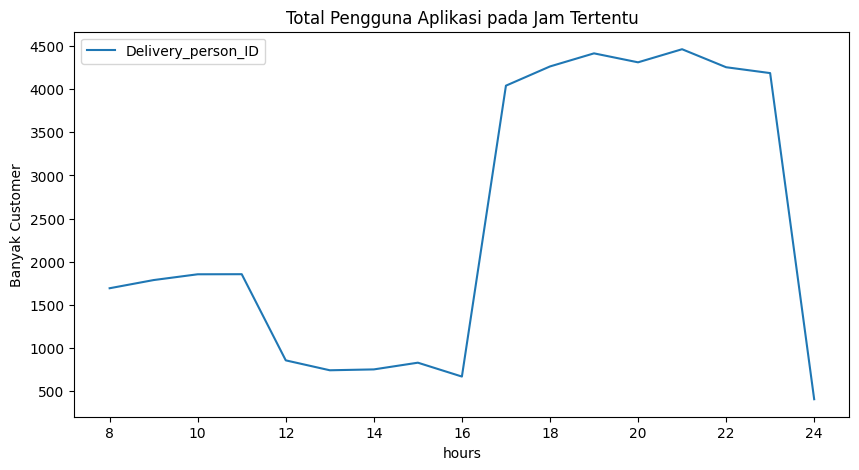

In [1755]:
df.groupby('hours')[['Delivery_person_ID']].count().plot(kind='line',figsize=(10,5),ylabel='Banyak Customer',title='Total Pengguna Aplikasi pada Jam Tertentu')

Grafik menunjukkan banyaknya user yang menggunakan aplikasi/memesan makanan di jam tertentu (dari jam 8 pagi - 12 malam)

In [1756]:
df['Type_of_order'].value_counts()

Meal       10421
Snack      10419
Drinks     10302
Buffet     10226
Name: Type_of_order, dtype: int64

Untuk tipe makanan yang dipesan ada meal, snack, drinks dan buffet dimana jumlah orang yang memesan masing-masing tipe makanan diatas tidak jauh berbeda satu sama lain 

In [1757]:
metro = df[df['City']=='Metropolitan']

Untuk selanjutnya agar bisa menjawab problem statement diatas maka city yang diambil hanya yang di area Metropolitan saja

<AxesSubplot: title={'center': 'Tipe Kendaraan yang digunakan di Area Metropolitan'}, ylabel='Type_of_vehicle'>

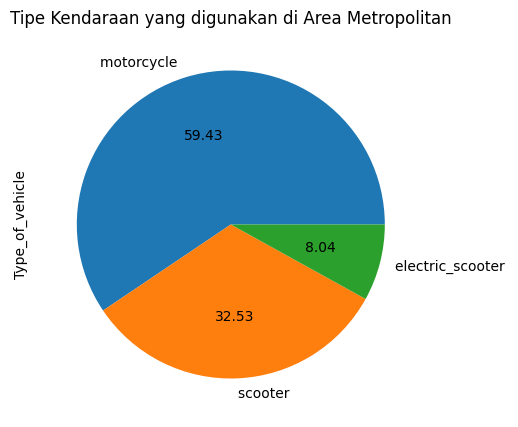

In [1758]:
metro['Type_of_vehicle'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f',title="Tipe Kendaraan yang digunakan di Area Metropolitan")

Tipe kendaraan yang paling sering digunakan di Area Metropolitan yaitu sepeda motor dan yang paling sedikit adalah electric scooter

In [1759]:
metro.groupby('Type_of_vehicle')[['Time_taken(min)','jarak_tempuh(km)']].mean()

,Time_taken(min),jarak_tempuh(km)
Type_of_vehicle,,
electric_scooter,25.468127,25.672378
motorcycle,28.604188,26.500914
scooter,25.768934,26.520350


Namun sebenarnya rata-rata waktu yang dibutuhkan sepeda motor untuk sampai tujuan ternyata yang paling lama dibandingkan electric scooter dan scooter, ini bisa menjadi salah satu rekomendasi untuk mengganti sepeda motor ke electric scooter dimana disisi lain electric scooter juga lebih ramah lingkungan dan jarak yang bisa ditempuh/dicover oleh electric scooter juga tidak berbeda jauh dengan sepeda motor

In [1760]:
metro['indikator_rating'].value_counts()

Excellent    25350
Good          5374
Average        912
Bad            100
Poor            86
Name: indikator_rating, dtype: int64

Rating di Area Metropolitan sudah cukup baik dimana yang memberikan rating Excellent mencapai 25 350

In [1761]:
metro.groupby('indikator_rating')[['total_waktu']].mean().sort_values('total_waktu')

,total_waktu
indikator_rating,
Excellent,35.408245
Good,44.869743
Bad,46.110000
Poor,46.930233
Average,47.178728


Rata-rata waktu yang dinilai paling baik dari segi rating customer adalah 35 menit

<AxesSubplot: title={'center': 'Rating yang diberikan customer terhadap Total Waktu'}, ylabel='indikator_rating'>

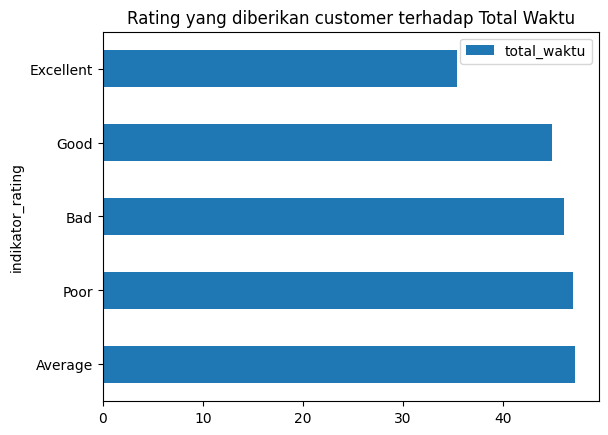

In [1762]:
metro.groupby('indikator_rating')[['total_waktu']].mean().sort_values('total_waktu',ascending=False).plot(kind='barh',title='Rating yang diberikan customer terhadap Total Waktu')

Grafik diatas membuktikan bahwa total waktu yang dibutuhkan untuk memesan makanan mempengaruhi rating, semakin cepat makanan sampai, semakin baik ratingnya

In [1763]:
metro.groupby('Weatherconditions')[['total_waktu']].mean().sort_values('total_waktu',ascending=True)

,total_waktu
Weatherconditions,
conditions Sunny,32.877186
conditions Stormy,36.795201
conditions Sandstorms,36.943482
conditions Windy,37.046446
conditions Cloudy,40.015762
conditions Fog,40.116337


Cuaca mempengaruhi waktu proses pengantaran makanan dimana pada saat cuaca cerah, makanan akan sampai lebih cepat daripada pada saat cuaca berkabut

In [1764]:
metro.groupby(['Road_traffic_density'])[['total_waktu']].mean().sort_values('total_waktu')

,total_waktu
Road_traffic_density,
Low,32.245137
Medium,37.740084
High,38.086712
Jam,41.936001


Sama halnya dengan cuaca, kondisi kemacetan/traffic jam juga mempengaruhi total waktu yang dibutuhkan untuk mengantar makanan

In [1765]:
metro.groupby('Delivery_person_Age')[['Delivery_person_ID']].count().sort_values('Delivery_person_ID',ascending=False)

,Delivery_person_ID
Delivery_person_Age,
35.0,1739
30.0,1733
36.0,1724
38.0,1694
33.0,1689
32.0,1672
37.0,1668
34.0,1660
39.0,1657


Rentang usia customer di Area Metropolitan yang menggunakan aplikasi yaitu dari 20 - 39 tahun dimana yang paling sering membeli rata-rata yang berusia diatas 30 tahun

In [1766]:
metro['Delivery_person_Age'].astype(str)
young = metro[metro['Delivery_person_Age'] < 30]
young['Type_of_order'].value_counts()


Snack      3818
Meal       3748
Drinks     3724
Buffet     3680
Name: Type_of_order, dtype: int64

Sebagai salah satu cara untuk menarik anak muda dengan memberikan diskon/promo untuk tipe makanan yang paling sering dibeli yaitu snack

In [1767]:
metro.groupby('multiple_deliveries')[['Delivery_person_ID']].count()

,Delivery_person_ID
multiple_deliveries,
0.0,9550
1.0,20385
2.0,1618
3.0,269


Data diatas menunjukkan customer rata-rata repeat order hanya 1 kali

In [1768]:
metro.groupby(['indikator_rating','multiple_deliveries'])[['Delivery_person_ID']].count()

Delivery_person_ID
indikator_rating multiple_deliveries                    
Average          0.0                                 194
                 1.0                                 567
                 2.0                                 136
                 3.0                                  15
Bad              0.0                                  17
                 1.0                                  63
                 2.0                                  20
Excellent        0.0                                8125
                 1.0                               16230
                 2.0                                 828
                 3.0                                 167
Good             0.0                                1199
                 1.0                                3466
                 2.0                                 622
                 3.0                                  87
Poor             0.0                                  15
                 1.0                                  59
                 2.0                                  12

In [1769]:
c = metro.groupby(['indikator_rating','multiple_deliveries'])[['Delivery_person_ID']].count().reset_index()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Average'),
  Text(3, 0, 'Bad'),
  Text(4, 0, 'Poor')])

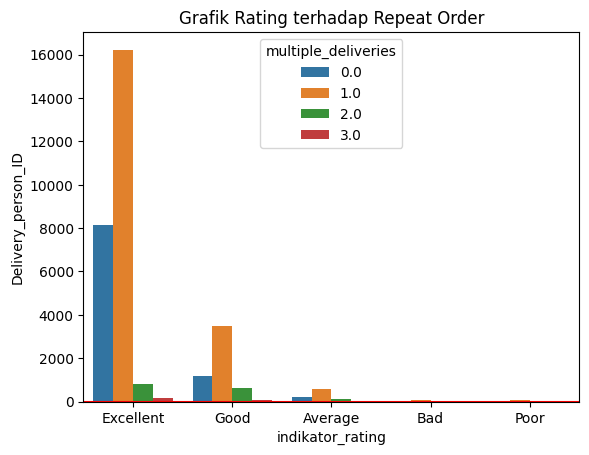

In [1770]:
sns.barplot(data=c, x= 'indikator_rating', y= 'Delivery_person_ID', hue='multiple_deliveries',order=['Excellent','Good','Average','Bad','Poor']).set(title='Grafik Rating terhadap Repeat Order')
plt.axhline(c['multiple_deliveries'].mean(), color='red')
plt.xticks(rotation = 360)

Data diatas membuktikan bahwa customer yang kurang/tidak puas dengan pelayanan food delivery ini tidak pernah repeat order lebih dari 2 kali

### Distribution & Density

#### Measure of Skewness and Kurtosis

In [1771]:
metro.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours,indikator_rating,jarak_tempuh(km)
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0,19,Excellent,20.18
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0,18,Excellent,7.79
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0,13,Excellent,6.21
6,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,2022-04-03,2023-02-23 19:15:00,2023-02-23 19:30:00,conditions Fog,Jam,Meal,scooter,1.0,Metropolitan,40,15.0,55.0,19,Excellent,16.60
7,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,2023-02-23 17:25:00,2023-02-23 17:30:00,conditions Cloudy,Medium,Meal,motorcycle,1.0,Metropolitan,32,5.0,37.0,17,Excellent,20.20


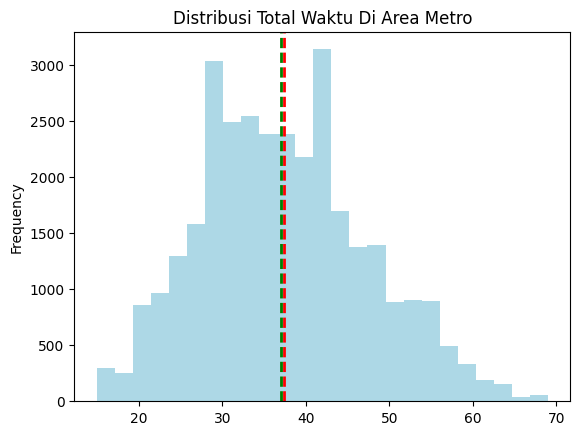

In [1772]:
waktu = metro['total_waktu']
waktu.plot.hist(title='Distribusi Total Waktu Di Area Metro', color='lightblue', bins=25)  
plt.axvline(waktu.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(waktu.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

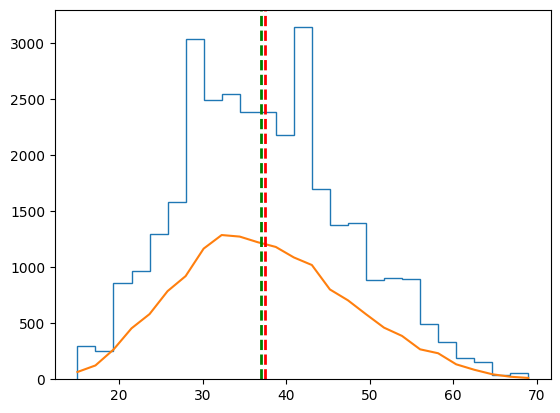

In [1773]:
waktu = metro['total_waktu']
density = stats.gaussian_kde(waktu)
n, x, _ = plt.hist(waktu, histtype='step', bins=25)  
plt.plot(x, density(x)*8**5)
plt.axvline(waktu.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(waktu.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()


Terlihat distribusi total waktu normal

total_waktu skewness: 0.3117753446117886
total_waktu kurtosis: -0.30799415177556444


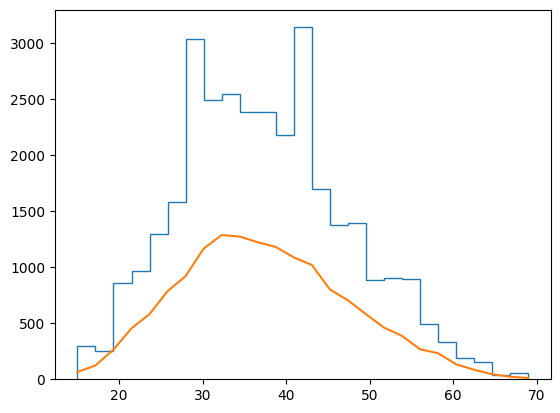

In [1774]:
numcols = ['total_waktu']
for col in numcols:
    print(metro[col].name + ' skewness: ' + str(metro[col].skew()))
    print(metro[col].name + ' kurtosis: ' + str(metro[col].kurt()))
    density = stats.gaussian_kde(metro[col])
    n, x, _ = plt.hist(metro[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*8**5)
    plt.show()
    print('\n')

Total waktu di area Metropolitan terdistribusi normal karena skewness diantara -0.5 dan 0.5 (total waktu skewness: 0.3117753446117886)

#### Z-Score

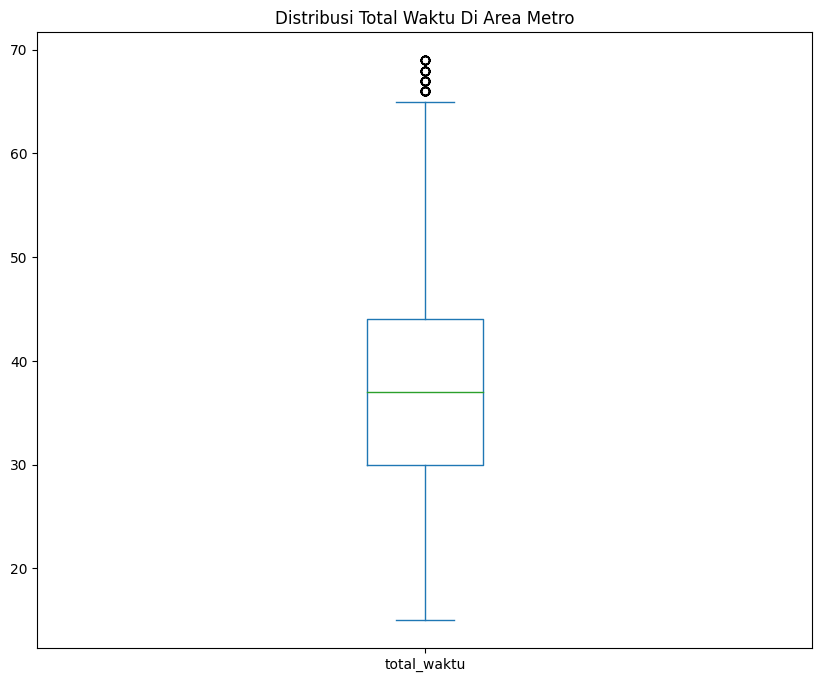

In [1775]:
metro['total_waktu'].plot(kind='box', title='Distribusi Total Waktu Di Area Metro',figsize=(10,8))
plt.show()

Melihat apakah ada outliers atau tidak

In [1776]:
metro['Z-Score'] = stats.zscore(metro['total_waktu'])
metro

/var/folders/ts/drf61cb133z5gjz33hcxvy280000gn/T/ipykernel_44604/1806164422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro['Z-Score'] = stats.zscore(metro['total_waktu'])


,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),Lama_Waktu_Pengambilan(min),total_waktu,hours,indikator_rating,jarak_tempuh(km),Z-Score
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-02-23 19:45:00,2023-02-23 19:50:00,conditions Stormy,Jam,Snack,scooter,1.0,Metropolitan,33,5.0,38.0,19,Excellent,20.18,0.059345
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-02-23 18:00:00,2023-02-23 18:10:00,conditions Sunny,Medium,Buffet,motorcycle,1.0,Metropolitan,21,10.0,31.0,18,Excellent,7.79,-0.642580
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-02-23 13:30:00,2023-02-23 13:45:00,conditions Cloudy,High,Snack,scooter,1.0,Metropolitan,30,15.0,45.0,13,Excellent,6.21,0.761270
6,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,2022-04-03,2023-02-23 19:15:00,2023-02-23 19:30:00,conditions Fog,Jam,Meal,scooter,1.0,Metropolitan,40,15.0,55.0,19,Excellent,16.60,1.764020
7,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,2023-02-23 17:25:00,2023-02-23 17:30:00,conditions Cloudy,Medium,Meal,motorcycle,1.0,Metropolitan,32,5.0,37.0,17,Excellent,20.20,-0.040930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2023-02-23 11:35:00,2023-02-23 11:45:00,conditions Windy,High,Meal,motorcycle,0.0,Metropolitan,32,10.0,42.0,11,Excellent,1.49,0.460445
45589,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2023-02-23 19:55:00,2023-02-23 20:10:00,conditions Windy,Jam,Buffet,motorcycle,1.0,Metropolitan,36,15.0,51.0,19,Excellent,11.01,1.362920
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2023-02-23 23:50:00,2023-02-23 00:05:00,conditions Cloudy,Low,Drinks,scooter,0.0,Metropolitan,16,15.0,31.0,23,Excellent,4.66,-0.642580
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2023-02-23 13:35:00,2023-02-23 13:40:00,conditions Cloudy,High,Snack,motorcycle,1.0,Metropolitan,26,5.0,31.0,13,Excellent,6.23,-0.642580


Karena distribusi data normal, untuk mengecek outliersnya maka menggunakan teknik Z-Score

In [1777]:
b = metro.loc[(metro['Z-Score']> 3) | (metro['Z-Score']< -3)].sort_values(by='Z-Score', ascending=False)

In [1778]:
b['Z-Score'].count()

33

Terdapat 33 outliers pada data (Dikatakan outliers apabila Z-Score lebih dari 3 dan kurang dari -3)

In [1779]:
print('Persentase outliers:', (33/31822)*100)

Persentase outliers: 0.10370184149330651


Persentase outliers dari data di atas hanya 0.10%

In [1780]:
b = metro.loc[~(metro['Z-Score']> 3) | (metro['Z-Score']< -3)].sort_values(by='Z-Score', ascending=False)
b['Z-Score'].count()

31789

Melakukan query untuk menghilangkan outliersnya (trimming), karena outliers hanya 0.10% dari total data maka bila dihilangkan tidak akan terlalu memmpengaruhi keseluruhan data

#### Central Tendency (Metropolitan Area)

In [1781]:
b.total_waktu.mean()

37.37591619742678

Rata-rata waktu yang dibutuhkan customer untuk mendapatkan makanannya di area metropolitan adalah 37.3 menit (sudah tidak ada outliersnya)

In [1782]:
b.total_waktu.median()

37.0

Median dari rata-rata total waktu di area metropolitan adalah 37 menit (sudah tidak ada outliersnya)

In [1783]:
b.total_waktu.mode()

0    34.0
dtype: float64

Waktu yang paling sering muncul yaitu 34 menit (sudah tidak ada outliersnya)

#### Measure of Variance

In [1784]:
R = b['total_waktu'].max() - b['total_waktu'].min()
print ('Range =' + ' '+ str(R))

Range = 52.0


In [1785]:
b.total_waktu.var()

98.5547313904854

In [1786]:
b.total_waktu.std()

9.927473565338031

Data diatas menunjukkan variasi data total waktu hingga 98 menit dengan standard deviasi 9 menit (semakin kecil nilai std deviasi semakin tidak beragam)

## Statistik Inferensial

### Confidence Interval

In [1787]:
ci = stats.norm.interval(0.95, b.total_waktu.mean(), b.total_waktu.std()/np.sqrt(len(b)))
print(f'Waktu ideal = {ci[0]} - {ci[1]}')

Waktu ideal = 37.26678513149912 - 37.485047263354446


Sebaiknya untuk area metropolitan, total waktu yang dibutuhkan customer dari pertama kali order sampai order selesai adalah dalam rentang waktu 37.2 - 37.4 menit (jangan lebih)

### One Sample Two Tailed

- H0 = μ = 37.30
- H1 = μ != 37.30

In [1788]:
t_stat,p_val = stats.ttest_1samp(b.total_waktu, 37.30)
print('P-value:',p_val)  
print('t-statistics:',t_stat)

P-value: 0.172755407189895
t-statistics: 1.363434064671868


Nilai asumsi yang dipilih yaitu 37.30 yang diambil dari rentang confidence interval

Karena nilai p-value diatas 0.05, maka artinya H0 fail to reject, dimana tidak terdapat perbedaan yang signifikan, artinya pelayanan pengiriman masih bisa ditingkatkan lagi supaya delivery bisa lebih cepat untuk mencapai customer's satisfaction, mengingat rata-rata waktu yang dinilai Excellent oleh customer yaitu 35 menit

# **VI. Conclusion**

Dari data-data diatas dapat disimpulkan bahwa:

- Rentang usia customer di Area Metropolitan yang menggunakan aplikasi yaitu dari 20 - 39 tahun dimana yang paling sering membeli rata-rata yang berusia diatas 30 tahun

- Traffic user paling banyak menggunakan aplikasi di jam 5 sore sampai 10 malam dan yang tipe makanan yang paling sering dibeli adalah meal/makanan berat

- Total waktu yang dibutuhkan untuk memesan makanan berbanding lurus dengan rating yang diberikan user, semakin cepat makanan sampai, semakin baik ratingnya

- Rata-rata total waktu yang dibutuhkan customer dari pertama kali order sampai order selesai adalah 37 menit dimana dalam hal ini pelayanan pengirimannya bisa terus ditingkatkan lagi karena rata-rata yang dinilai Excellent oleh user yaitu 35 menit.

- Salah satu cara untuk meningkatkan jumlah user muda (dibawah 30 tahun) di area metropolitan, bisa dengan memberikan diskon/promo untuk tipe makanan snack.

- Dapat dilakukan pertimbangan juga untuk mengganti sepeda motor dengan electric scooter karena bisa lebih menghemat biaya dan lebih ramah lingkungan tanpa mengurangi kualitas pelayanan

In [1789]:
df.to_csv('milestone1.csv')

Mengganti dari bentuk notebook menjadi csv